## Top predictions analysis

In [1]:
import pandas

In [2]:
# open top predictions file
top_pred_df = pandas.read_excel('predictions/top-predictions.xlsx')
top_pred_df.head(2)

,compound_name,disease_name,category,prediction,compound_percentile,disease_percentile,prior_prob,n_trials
0,Pamidronate,osteoporosis,DM,0.886899,1.0,1.00000,0.03893,0
1,Alendronate,osteoporosis,DM,0.884991,1.0,0.99935,0.03893,68


In [3]:
# Number of top predictions
len(top_pred_df)

3980

In [4]:
# open all predictions file
pred_df = pandas.read_table('predictions/probabilities.tsv')
#pred_df.head(2)
pred_df.sort_values('prediction', ascending=False).head(2)

,compound_id,compound_name,disease_id,disease_name,category,status,prior_prob,prediction,training_prediction,compound_percentile,disease_percentile,n_trials,status_trials,status_drugcentral
139518,DB00282,Pamidronate,DOID:11476,osteoporosis,DM,1,0.03893,0.886899,0.977108,1.0,1.00000,NaN,NaN,NaN
138453,DB00630,Alendronate,DOID:11476,osteoporosis,DM,1,0.03893,0.884991,0.976682,1.0,0.99935,NaN,NaN,NaN


In [5]:
# Number of total predictions
len(pred_df)

209168

In [6]:
# Number of predictions with status = 1 in all predictions dataset
len(pred_df[pred_df.status == 1])

755

In [7]:
# add compound and disease IDs and status vectors into top_pred_df
pred_df = pred_df[['compound_id','compound_name','disease_id', 'disease_name', 'status']]
pred_df.head(2)

,compound_id,compound_name,disease_id,disease_name,status
0,DB01048,Abacavir,DOID:10652,Alzheimer's disease,0
1,DB05812,Abiraterone,DOID:10652,Alzheimer's disease,0


In [8]:
top_id_df = pandas.merge(top_pred_df, pred_df, how='left', on=['compound_name','disease_name'])
top_id_df.head(2)

,compound_name,disease_name,category,prediction,compound_percentile,disease_percentile,prior_prob,n_trials,compound_id,disease_id,status
0,Pamidronate,osteoporosis,DM,0.886899,1.0,1.00000,0.03893,0,DB00282,DOID:11476,1
1,Alendronate,osteoporosis,DM,0.884991,1.0,0.99935,0.03893,68,DB00630,DOID:11476,1


In [9]:
# reorder columns
cols = top_id_df.columns.tolist()
cols = [cols[0] , cols[8] , cols[1] , cols[9] , cols[10]] + cols[2:7]
cols
top_id_df = top_id_df[cols]
top_id_df.head(2)

,compound_name,compound_id,disease_name,disease_id,status,category,prediction,compound_percentile,disease_percentile,prior_prob
0,Pamidronate,DB00282,osteoporosis,DOID:11476,1,DM,0.886899,1.0,1.00000,0.03893
1,Alendronate,DB00630,osteoporosis,DOID:11476,1,DM,0.884991,1.0,0.99935,0.03893


In [10]:
# save df
with open('./top-predictions/top-predictions.tsv', 'w') as write_file:
    top_id_df.to_csv(write_file, float_format='%.5g', sep='\t', index=False)

In [11]:
# DOID - replace ':' by '_'
top_df = top_id_df
top_df['disease_id'] = top_df.disease_id.str.replace(':','_')
top_df.head(2)

,compound_name,compound_id,disease_name,disease_id,status,category,prediction,compound_percentile,disease_percentile,prior_prob
0,Pamidronate,DB00282,osteoporosis,DOID_11476,1,DM,0.886899,1.0,1.00000,0.03893
1,Alendronate,DB00630,osteoporosis,DOID_11476,1,DM,0.884991,1.0,0.99935,0.03893


In [12]:
# save df
with open('./top-predictions/top-predictions.tsv', 'w') as write_file:
    top_id_df.to_csv(write_file, float_format='%.5g', sep='\t', index=False)

## Statistics

### Top predictions dataset

In [13]:
# Number of top predictions
print('Top predictions (prob > 1%)')
print('number of top predictions: {}'.format(len(top_df)))

Top predictions (prob > 1%)
number of top predictions: 3980


In [14]:
# percentage to all predictions
print('top predictions are {}% to all predictions'.format(round(len(top_df)*100/len(pred_df))))

top predictions are 2% to all predictions


In [15]:
# Number of predictions with status = 1 in top predictions dataset
print('number of top predictions that are known treatments: {}'.format(len(top_df[top_df.status == 1])))

number of top predictions that are known treatments: 586


In [16]:
# percentage of status = 1 to all predictions
print('{}% of predictions that are known treatments are in the top predictions set'.format(round(len(top_df[top_df.status == 1])*100/len(pred_df[pred_df.status == 1]))))

78% of predictions that are known treatments are in the top predictions set


In [17]:
# top 10 predictions 

top_df.head(10)

,compound_name,compound_id,disease_name,disease_id,status,category,prediction,compound_percentile,disease_percentile,prior_prob
0,Pamidronate,DB00282,osteoporosis,DOID_11476,1,DM,0.886899,1.000000,1.000000,0.038930
1,Alendronate,DB00630,osteoporosis,DOID_11476,1,DM,0.884991,1.000000,0.999350,0.038930
2,Risedronate,DB00884,osteoporosis,DOID_11476,1,DM,0.881065,1.000000,0.998700,0.038930
3,Esomeprazole,DB00736,Barrett's esophagus,DOID_9206,1,DM,0.823134,1.000000,1.000000,0.002341
4,Ibandronate,DB00710,Paget's disease of bone,DOID_5408,0,NaN,0.802573,1.000000,1.000000,0.007231
5,Glyburide,DB01016,type 2 diabetes mellitus,DOID_9352,1,DM,0.799647,1.000000,1.000000,0.058840
6,Omeprazole,DB00338,Barrett's esophagus,DOID_9206,1,DM,0.786771,1.000000,0.999350,0.002341
7,Alendronate,DB00630,Paget's disease of bone,DOID_5408,1,DM,0.769796,0.992647,0.999350,0.014860
8,Etidronic acid,DB01077,Paget's disease of bone,DOID_5408,1,DM,0.748826,1.000000,0.998700,0.014860
9,Pamidronate,DB00282,Paget's disease of bone,DOID_5408,1,DM,0.729643,0.992647,0.998049,0.014860


In [18]:
# top 10 predictions with status = 1 

top_df[top_df.status == 1].head(10)

,compound_name,compound_id,disease_name,disease_id,status,category,prediction,compound_percentile,disease_percentile,prior_prob
0,Pamidronate,DB00282,osteoporosis,DOID_11476,1,DM,0.886899,1.000000,1.000000,0.038930
1,Alendronate,DB00630,osteoporosis,DOID_11476,1,DM,0.884991,1.000000,0.999350,0.038930
2,Risedronate,DB00884,osteoporosis,DOID_11476,1,DM,0.881065,1.000000,0.998700,0.038930
3,Esomeprazole,DB00736,Barrett's esophagus,DOID_9206,1,DM,0.823134,1.000000,1.000000,0.002341
5,Glyburide,DB01016,type 2 diabetes mellitus,DOID_9352,1,DM,0.799647,1.000000,1.000000,0.058840
6,Omeprazole,DB00338,Barrett's esophagus,DOID_9206,1,DM,0.786771,1.000000,0.999350,0.002341
7,Alendronate,DB00630,Paget's disease of bone,DOID_5408,1,DM,0.769796,0.992647,0.999350,0.014860
8,Etidronic acid,DB01077,Paget's disease of bone,DOID_5408,1,DM,0.748826,1.000000,0.998700,0.014860
9,Pamidronate,DB00282,Paget's disease of bone,DOID_5408,1,DM,0.729643,0.992647,0.998049,0.014860
10,Furosemide,DB00695,hypertension,DOID_10763,1,DM,0.717139,1.000000,1.000000,0.283300


In [19]:
# top 10 predictions with status = 0 

top_df[top_df.status != 1].head(10)

,compound_name,compound_id,disease_name,disease_id,status,category,prediction,compound_percentile,disease_percentile,prior_prob
4,Ibandronate,DB00710,Paget's disease of bone,DOID_5408,0,NaN,0.802573,1.000000,1.000000,0.007231
15,Olsalazine,DB01250,Crohn's disease,DOID_8778,0,NaN,0.665331,1.000000,1.000000,0.007231
18,Paricalcitol,DB00910,osteoporosis,DOID_11476,0,NaN,0.603481,1.000000,0.996749,0.000000
20,Ethotoin,DB00754,epilepsy syndrome,DOID_1826,0,NaN,0.588531,1.000000,0.999350,0.000000
22,Quazepam,DB01589,epilepsy syndrome,DOID_1826,0,NaN,0.569974,1.000000,0.998700,0.000000
23,Alprazolam,DB00404,epilepsy syndrome,DOID_1826,0,NaN,0.564904,1.000000,0.998049,0.000000
24,Paricalcitol,DB00910,psoriasis,DOID_8893,0,NaN,0.564575,0.992647,1.000000,0.000000
25,Zidovudine,DB00495,hepatitis B,DOID_2043,0,NaN,0.560460,1.000000,1.000000,0.004753
26,Tafluprost,DB08819,glaucoma,DOID_1686,0,NaN,0.555917,1.000000,1.000000,0.000000
29,Carboprost Tromethamine,DB00429,glaucoma,DOID_1686,0,NaN,0.551495,1.000000,0.999350,0.000000


In [20]:
# bottom 10 predictions 

top_df.tail(10)

,compound_name,compound_id,disease_name,disease_id,status,category,prediction,compound_percentile,disease_percentile,prior_prob
3970,Temsirolimus,DB06287,thyroid cancer,DOID_1781,0,NaN,0.010033,0.985294,0.982445,0.004753
3971,Venlafaxine,DB00285,hypertension,DOID_10763,0,NaN,0.010031,0.985294,0.802991,0.000000
3972,Procaine,DB00721,gout,DOID_13189,0,NaN,0.010027,1.000000,0.942783,0.000000
3973,Trifluridine,DB00432,breast cancer,DOID_1612,0,NaN,0.010026,0.926471,0.931730,0.000000
3974,Tropicamide,DB00809,atopic dermatitis,DOID_3310,0,NaN,0.010018,0.992647,0.950585,0.000000
3975,Ribavirin,DB00811,multiple sclerosis,DOID_2377,0,NaN,0.010017,0.977941,0.957087,0.000000
3976,Magnesium salicylate,DB01397,Crohn's disease,DOID_8778,0,NaN,0.010015,0.985294,0.979194,0.000000
3977,Isoniazid,DB00951,epilepsy syndrome,DOID_1826,0,NaN,0.010009,0.977941,0.830949,0.000000
3978,Estramustine,DB01196,ovarian cancer,DOID_2394,0,NaN,0.010006,0.963235,0.976593,0.012370
3979,Altretamine,DB00488,lymphatic system cancer,DOID_0060073,0,NaN,0.010003,0.963235,0.972692,0.011070


In [21]:
# bottom 10 predictions status = 1

top_df[top_df.status != 0].tail(10)

,compound_name,compound_id,disease_name,disease_id,status,category,prediction,compound_percentile,disease_percentile,prior_prob
3547,Erlotinib,DB00530,pancreatic cancer,DOID_1793,1,DM,0.011144,0.955882,0.974642,0.038810
3576,Etoposide,DB00773,uterine cancer,DOID_363,1,DM,0.011064,0.867647,0.971391,0.116100
3578,Telbivudine,DB01265,hepatitis B,DOID_2043,1,DM,0.011053,0.985294,0.986346,0.004753
3605,Cromoglicic acid,DB01003,asthma,DOID_2841,1,DM,0.010968,0.992647,0.911573,0.053050
3610,Valrubicin,DB00385,urinary bladder cancer,DOID_11054,1,DM,0.010955,0.911765,0.973992,0.013700
3699,Crizotinib,DB08865,lung cancer,DOID_1324,1,DM,0.010704,0.897059,0.958388,0.020550
3796,Cyproheptadine,DB00434,allergic rhinitis,DOID_4481,1,DM,0.010483,0.970588,0.917425,0.019160
3817,Vigabatrin,DB01080,epilepsy syndrome,DOID_1826,1,DM,0.010423,0.992647,0.836801,0.033790
3861,Irinotecan,DB00762,stomach cancer,DOID_10534,1,DM,0.010338,0.882353,0.977893,0.073890
3930,Varenicline,DB01273,nicotine dependence,DOID_0050742,1,DM,0.010156,0.970588,0.985046,0.001162


In [22]:
# middle 10 predictions 

top_df[top_df.prediction >= 0.3].tail(10)

,compound_name,compound_id,disease_name,disease_id,status,category,prediction,compound_percentile,disease_percentile,prior_prob
151,Vincristine,DB00541,lung cancer,DOID_1324,0,NaN,0.311483,0.992647,0.999350,0.1531
152,Nimodipine,DB00393,hypertension,DOID_10763,0,NaN,0.309810,1.000000,0.989597,0.0000
153,Nicardipine,DB00622,hypertension,DOID_10763,1,DM,0.308676,1.000000,0.988947,0.1106
154,Hydrocortisone,DB00741,asthma,DOID_2841,1,DM,0.308449,0.992647,0.992848,0.3623
155,Dexamethasone,DB01234,ankylosing spondylitis,DOID_7147,1,DM,0.308230,0.955882,0.999350,0.1316
156,Azilsartan medoxomil,DB08822,hypertension,DOID_10763,0,NaN,0.307553,1.000000,0.988296,0.0000
157,Ethinyl Estradiol,DB00977,prostate cancer,DOID_10283,1,DM,0.306275,0.992647,0.997399,0.0560
158,Prednisone,DB00635,asthma,DOID_2841,1,DM,0.305832,1.000000,0.992198,0.5673
159,Enalapril,DB00584,hypertension,DOID_10763,1,DM,0.304517,1.000000,0.987646,0.2039
160,Acetazolamide,DB00819,glaucoma,DOID_1686,1,DM,0.303039,1.000000,0.996099,0.0560


### Distribution of predictions

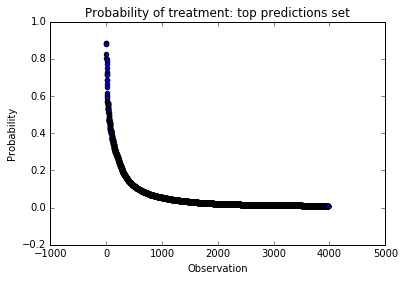

In [23]:
# Probability of predictions
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Probability of treatment: top predictions set")
plt.ylabel("Probability")
plt.xlabel("Observation")
plt.scatter(top_df.index,top_df.prediction)

number of predictions status =1: 586
number of predictions status =1 with prob less than 0.1: 301


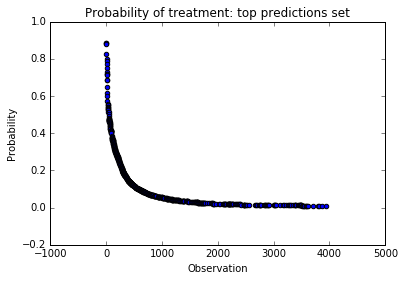

In [24]:
# Probability of predictions status = 1

plt.title("Probability of treatment: top predictions set")
plt.ylabel("Probability")
plt.xlabel("Observation")
plt.scatter(top_df[top_df.status == 1].index,top_df[top_df.status == 1].prediction)
print('number of predictions status =1: {}'.format(len(top_df[top_df.status == 1])))
xx = top_df[(top_df.status == 1) & (top_df.prediction < 0.1)]
print('number of predictions status =1 with prob less than 0.1: {}'.format(len(xx)))

3394

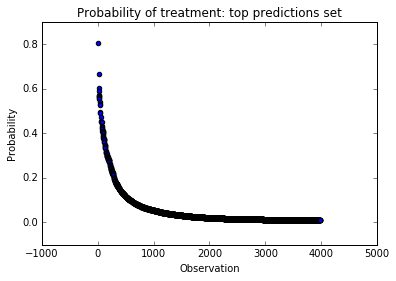

In [25]:
# Probability of predictions status = 0

plt.title("Probability of treatment: top predictions set")
plt.ylabel("Probability")
plt.xlabel("Observation")
plt.scatter(top_df[top_df.status == 0].index,top_df[top_df.status == 0].prediction)
len(top_df[top_df.status == 0])

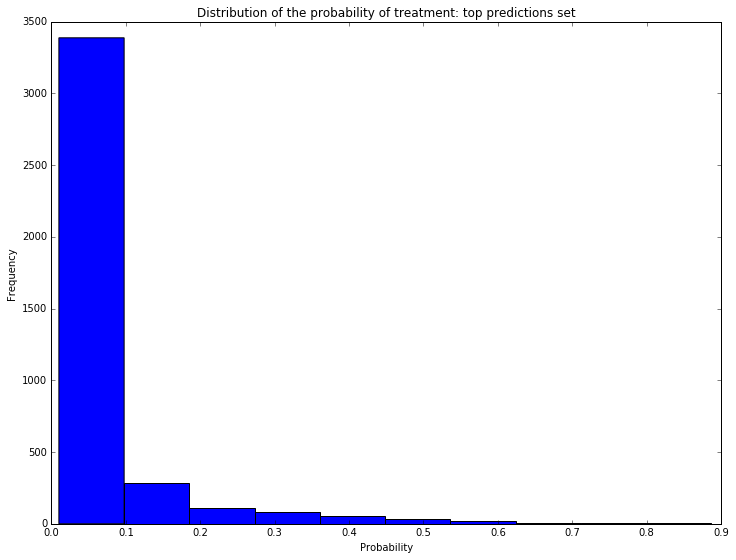

In [26]:
# distribution of predictions

plt.figure(figsize=(12, 9))
plt.title("Distribution of the probability of treatment: top predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(top_df.prediction)
plt.savefig("prediction-distribution.png", bbox_inches="tight")

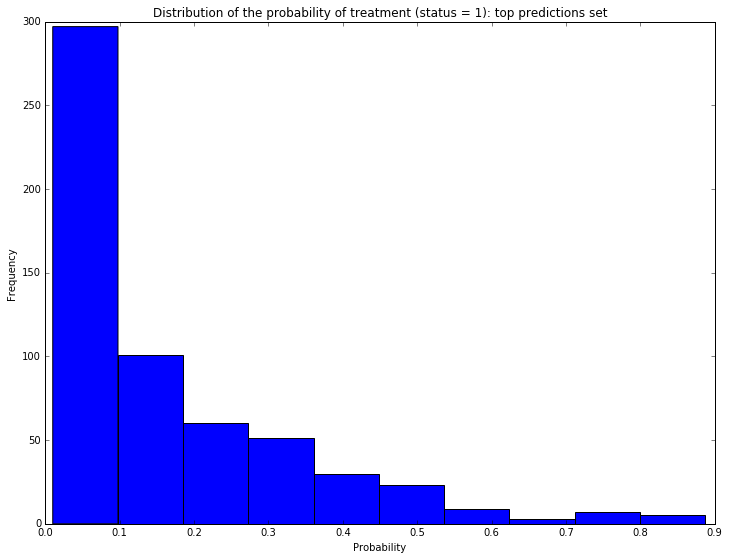

In [27]:
# distribution of prediction for status == 1 observations

plt.figure(figsize=(12, 9))
plt.title("Distribution of the probability of treatment (status = 1): top predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(top_df[top_df.status == 1].prediction)
plt.savefig("prediction-status1-distribution.png", bbox_inches="tight")

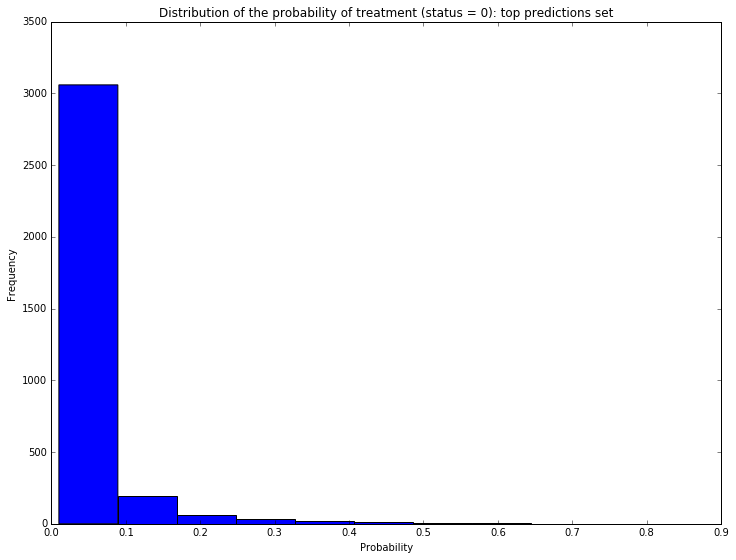

In [28]:
# distribution of prediction for status == 0 observations

plt.figure(figsize=(12, 9))
plt.title("Distribution of the probability of treatment (status = 0): top predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(top_df[top_df.status == 0].prediction)
plt.savefig("prediction-status0-distribution.png", bbox_inches="tight")

### Distribution of the prior

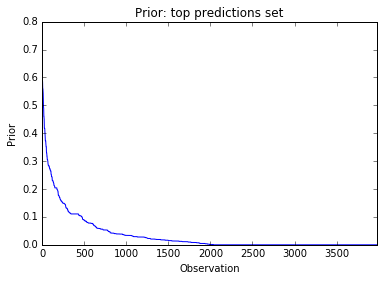

In [29]:
# Prior behaviour

plt.title("Prior: top predictions set")
plt.ylabel("Prior")
plt.xlabel("Observation")
xx = top_df.prior_prob
xx.sort_values(ascending = False).head()
yy = xx.sort_values(ascending = False)
yy.plot(use_index=False)

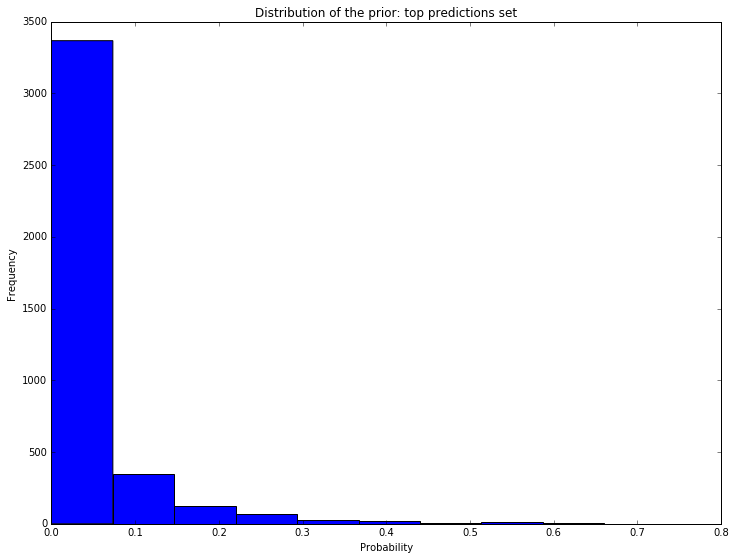

In [30]:
# distribution of the prior feature

plt.figure(figsize=(12, 9))
plt.title("Distribution of the prior: top predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(top_df.prior_prob)
plt.savefig("prior-distribution.png", bbox_inches="tight")

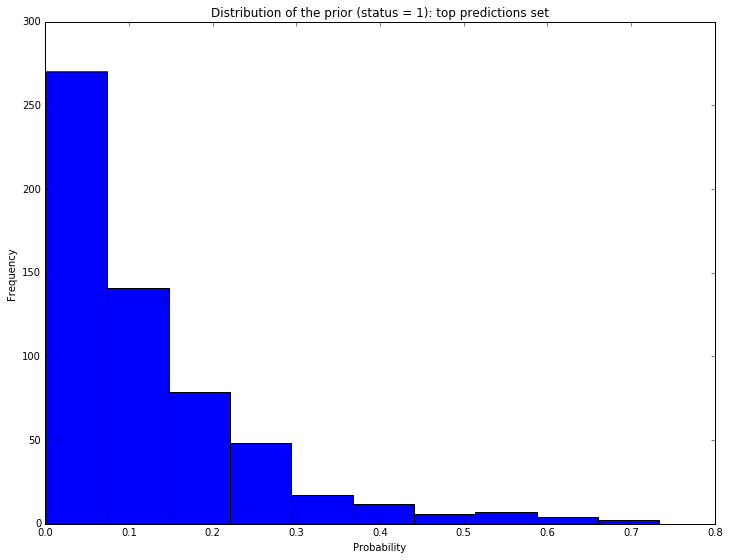

In [31]:
# distribution of the prior feature - status = 1

plt.figure(figsize=(12, 9))
plt.title("Distribution of the prior (status = 1): top predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(top_df[top_df.status == 1].prior_prob)
plt.savefig("prior-status1-distribution.png", bbox_inches="tight")

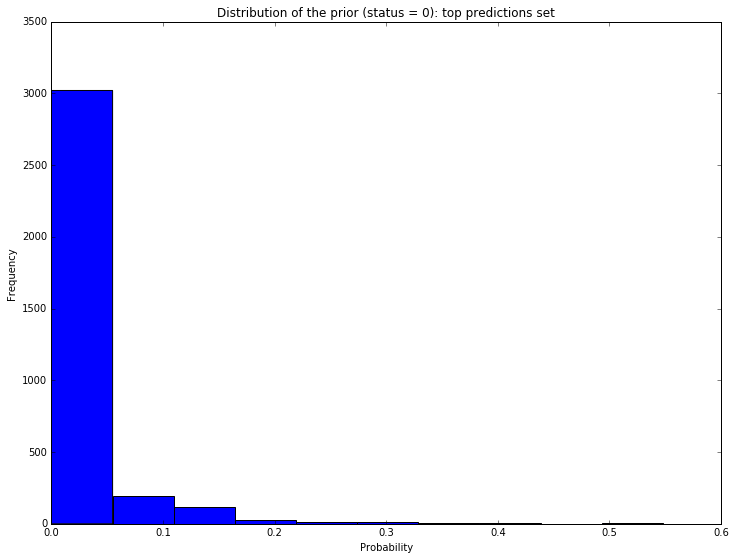

In [32]:
# distribution of the prior feature - status = 0

plt.figure(figsize=(12, 9))
plt.title("Distribution of the prior (status = 0): top predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(top_df[top_df.status == 0].prior_prob)
plt.savefig("prior-status0-distribution.png", bbox_inches="tight")

### Prediction vs Prior

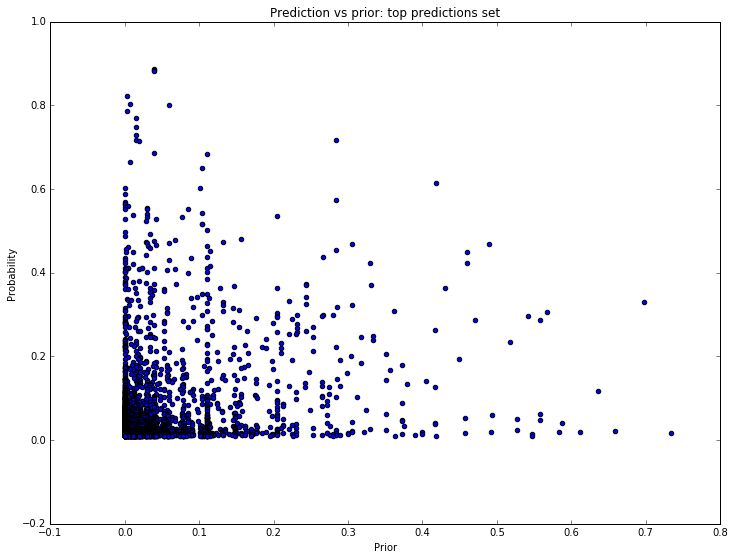

In [33]:
# distribution of the prediction versus the prior feature 

plt.figure(figsize=(12, 9))
plt.title("Prediction vs prior: top predictions set")
plt.xlabel("Prior")
plt.ylabel("Probability")
plt.scatter(x=top_df.prior_prob, y=top_df.prediction)
plt.savefig("prediction-prior-distribution.png", bbox_inches="tight")

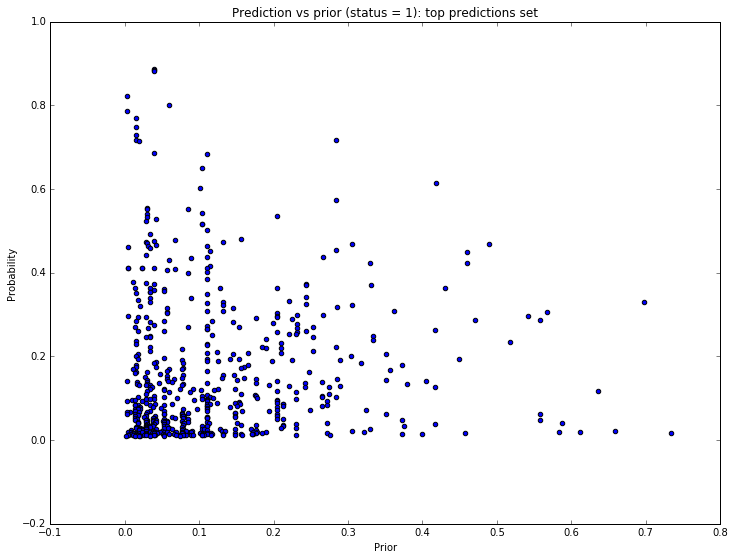

In [34]:
# distribution of the prediction versus the prior feature - status = 1

plt.figure(figsize=(12, 9))
plt.title("Prediction vs prior (status = 1): top predictions set")
plt.xlabel("Prior")
plt.ylabel("Probability")
plt.scatter(x=top_df[top_df.status == 1].prior_prob, y=top_df[top_df.status == 1].prediction)
plt.savefig("prediction-prior-status1-distribution.png", bbox_inches="tight")

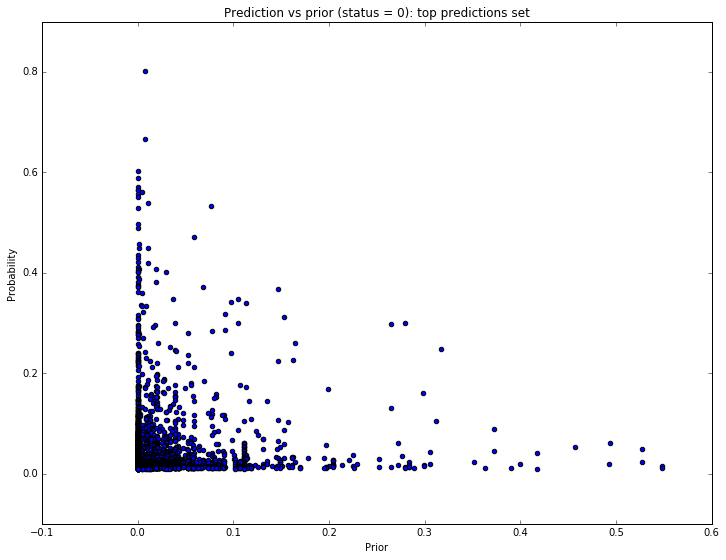

In [35]:
# distribution of the prediction versus the prior feature - status = 0

plt.figure(figsize=(12, 9))
plt.title("Prediction vs prior (status = 0): top predictions set")
plt.xlabel("Prior")
plt.ylabel("Probability")
plt.scatter(x=top_df[top_df.status == 0].prior_prob, y=top_df[top_df.status == 0].prediction)
plt.savefig("prediction-prior-status0-distribution.png", bbox_inches="tight")

### All predictions data set

In [36]:
# load all predictions data set

pred_df = pandas.read_table('predictions/probabilities.tsv')
print("number of observations: {}".format(len(pred_df)))
print("number of unique observations: {}".format(len(pred_df.groupby(['compound_id', 'disease_id'])['prediction'].mean())))
print("number of unique prior_prob: {}".format(len(set(list(pred_df.prior_prob)))))
print("number of unique prediction: {}".format(len(set(list(pred_df.prediction)))))
pred_df.head(2)

number of observations: 209168
number of unique observations: 209168
number of unique prior_prob: 402
number of unique prediction: 202672


,compound_id,compound_name,disease_id,disease_name,category,status,prior_prob,prediction,training_prediction,compound_percentile,disease_percentile,n_trials,status_trials,status_drugcentral
0,DB01048,Abacavir,DOID:10652,Alzheimer's disease,NaN,0,0.004753,0.000930,0.001129,0.125000,0.154746,0.0,0.0,0.0
1,DB05812,Abiraterone,DOID:10652,Alzheimer's disease,NaN,0,0.004753,0.003795,0.004604,0.757353,0.842653,0.0,0.0,0.0


In [37]:
# number of observations with prior == 0.008491

print("number of observations with prior == 0.008491: {}".format(len(pred_df[pred_df.prior_prob == 0.008491])))

number of observations with prior == 0.008491: 1290


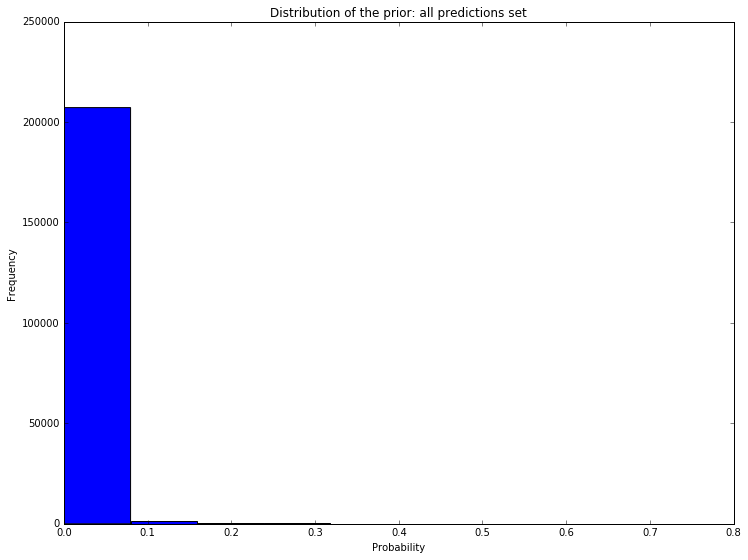

In [38]:
# hist of prior_prob

plt.figure(figsize=(12, 9))
plt.title("Distribution of the prior: all predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(pred_df.prior_prob)
plt.savefig("prior-distribution-all.png", bbox_inches="tight")

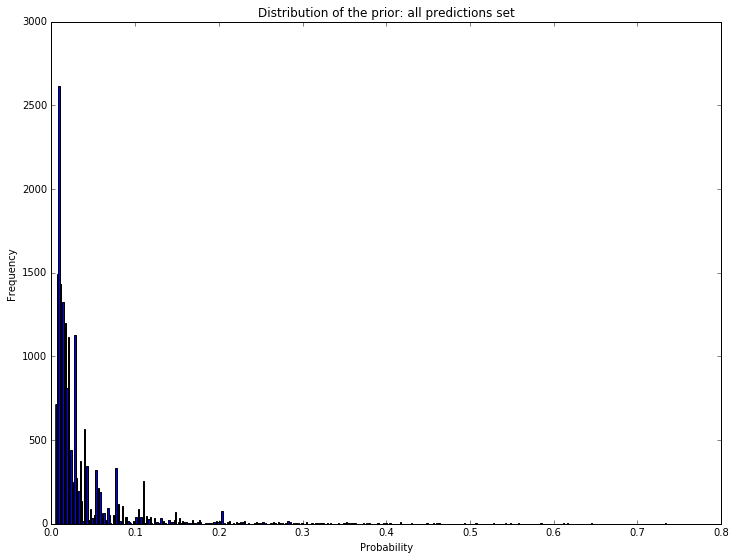

In [39]:
plt.figure(figsize=(12, 9))
plt.title("Distribution of the prior: all predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(pred_df.prior_prob[pred_df.prior_prob > 0.005], bins=500)
plt.savefig("prior-distribution-all.png", bbox_inches="tight")

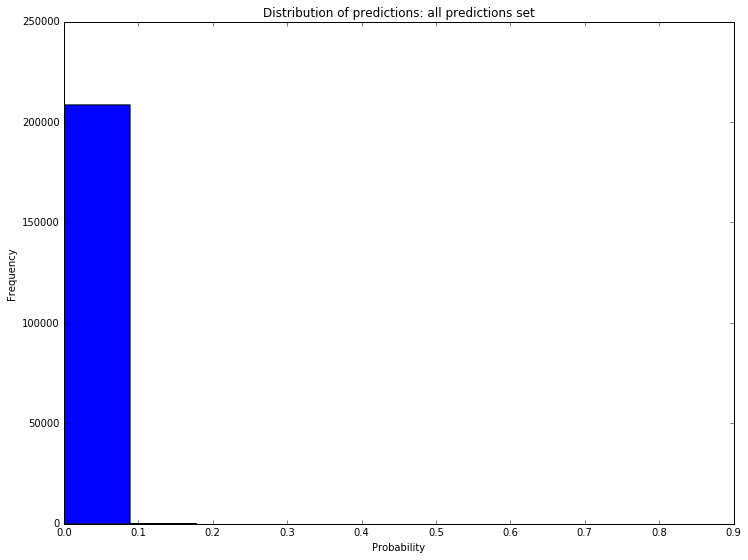

In [40]:
# hist of predictions

plt.figure(figsize=(12, 9))
plt.title("Distribution of predictions: all predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(pred_df.prediction)
plt.savefig("predictions-distribution-all.png", bbox_inches="tight")

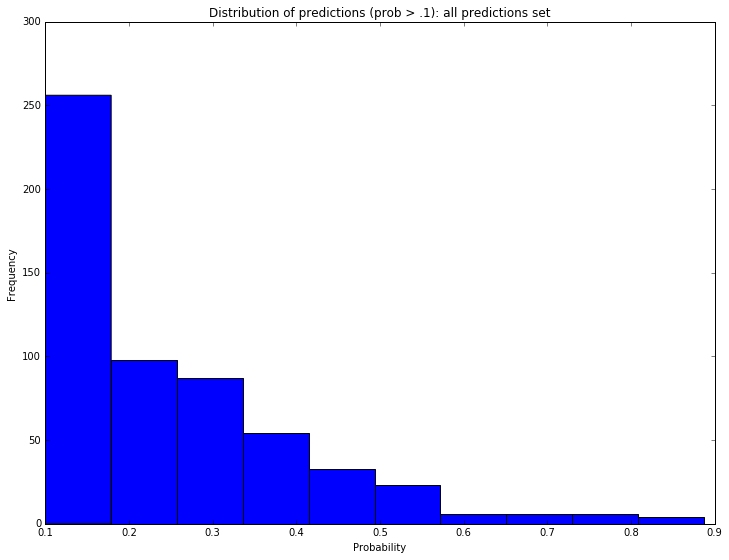

In [41]:
# hist of predictions > 0.1

plt.figure(figsize=(12, 9))
plt.title("Distribution of predictions (prob > .1): all predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(pred_df.prediction[pred_df.prediction > 0.1])
plt.savefig("predictions-distribution-all.png", bbox_inches="tight")

(array([  6.99810000e+04,   9.62600000e+04,   2.31120000e+04,
          7.38700000e+03,   3.52500000e+03,   2.00700000e+03,
          1.19800000e+03,   8.27000000e+02,   5.39000000e+02,
          4.17000000e+02,   3.82000000e+02,   2.76000000e+02,
          2.60000000e+02,   2.20000000e+02,   1.71000000e+02,
          1.41000000e+02,   1.25000000e+02,   1.16000000e+02,
          8.60000000e+01,   9.10000000e+01,   7.00000000e+01,
          6.30000000e+01,   5.30000000e+01,   5.30000000e+01,
          5.30000000e+01,   5.10000000e+01,   4.90000000e+01,
          5.00000000e+01,   3.20000000e+01,   2.70000000e+01,
          3.00000000e+01,   2.40000000e+01,   3.70000000e+01,
          3.30000000e+01,   3.30000000e+01,   2.80000000e+01,
          3.10000000e+01,   2.10000000e+01,   2.80000000e+01,
          2.50000000e+01,   2.00000000e+01,   2.10000000e+01,
          3.10000000e+01,   1.80000000e+01,   1.70000000e+01,
          1.10000000e+01,   1.90000000e+01,   1.50000000e+01,
        

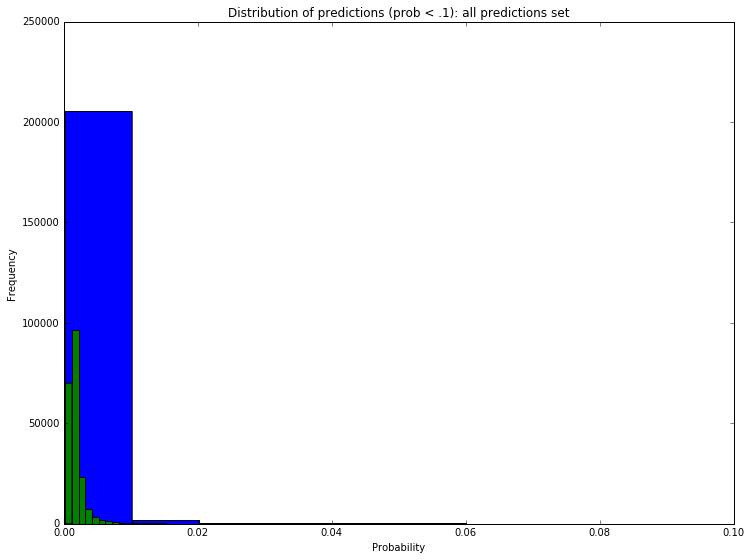

In [42]:
# hist of predictions < 0.1

plt.figure(figsize=(12, 9))
plt.title("Distribution of predictions (prob < .1): all predictions set")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.hist(pred_df.prediction[pred_df.prediction < 0.1])
plt.savefig("predictions-distribution-all.png", bbox_inches="tight")
plt.hist(pred_df.prediction[pred_df.prediction < 0.1], bins = 100)

In [43]:
# See prediction values for the amitriptyline (DB00321) - migrane (DOID:6364) observation

amit_df = pred_df[pred_df.compound_id == 'DB00321']
amit_migraine_df = amit_df[amit_df.disease_id == 'DOID:6364']
amit_migraine_df

,compound_id,compound_name,disease_id,disease_name,category,status,prior_prob,prediction,training_prediction,compound_percentile,disease_percentile,n_trials,status_trials,status_drugcentral
123111,DB00321,Amitriptyline,DOID:6364,migraine,DM,1,0.008491,0.0139,0.025136,0.977941,0.938882,NaN,NaN,NaN
